Building a simple Neural Network Mode1

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential([
    
])

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
data=pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [9]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [11]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [12]:
data.describe(include='all')

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [13]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train

array([[ 16.16126032,  69.73492845,  13.08349203, 669.0539383 ],
       [ 38.61914325,  27.3131656 ,  16.68289194, 216.7110804 ],
       [ 30.26550106,  24.09033856,  10.3806456 , 127.093485  ],
       ...,
       [ 34.38819042,  66.58684679,  17.33540709, 833.2039042 ],
       [ 32.52422829,  21.79841539,   7.7896379 , 450.3074245 ],
       [ 22.85889953,  73.0271531 ,   3.15909646, 923.0937975 ]])

In [18]:
x_test

array([[2.45222714e+01, 7.60661616e+01, 2.68870259e+00, 5.22196490e+02],
       [3.54149860e+01, 3.16773507e+01, 1.08896467e+01, 7.76059423e+02],
       [2.65669946e+01, 6.96522737e+01, 7.31361497e+00, 9.13923797e+02],
       [2.39024181e+01, 5.60356600e+01, 9.44563608e+00, 5.58868609e+02],
       [3.87515492e+01, 2.67151772e+01, 2.81105935e+00, 2.17072603e+02],
       [3.92367608e+01, 3.04114709e+01, 2.23024425e+00, 8.21301199e+02],
       [2.65633679e+01, 3.20560213e+01, 1.78579049e+00, 1.00588052e+02],
       [3.66515972e+01, 2.10939550e+01, 1.02086498e+01, 8.35276516e+02],
       [1.66427160e+01, 6.37094406e+01, 3.50443544e+00, 8.50279609e+02],
       [2.79697655e+01, 7.10724148e+01, 1.58813169e+00, 7.68593344e+02],
       [3.59724522e+01, 6.58623597e+01, 1.28123037e+01, 5.12136095e+02],
       [3.42817587e+01, 4.30595988e+01, 4.77592423e+00, 9.52060356e+02],
       [2.83154317e+01, 4.39589549e+01, 1.93209501e+01, 9.28665685e+02],
       [2.03735095e+01, 5.10847260e+01, 1.46888786e

In [19]:
y_train

array([212.2135273 , 314.5962333 , 445.961582  , 355.579972  ,
       219.8134296 , 385.3466342 , 224.9268565 , 391.9206463 ,
       324.5485649 , 295.0498961 ,  96.27916647, 110.5593202 ,
       165.6782115 , 125.4049427 , 125.7253648 , 109.480846  ,
       423.3032221 , 486.1948155 , 142.6074696 , 419.1139935 ,
        86.08404057, 243.7411194 , 251.0269109 , 140.6877701 ,
       116.223463  , 392.0724184 , 230.1407763 , 402.9824629 ,
       466.7268019 , 241.9248863 , 314.6002085 ,  80.79831916,
       262.2829269 , 190.6691112 , 496.661808  , 171.7897739 ,
       300.4090868 , 386.8739189 , 274.9815464 , 339.7804608 ,
       119.2549571 ,  98.62005172, 297.7392563 , 335.7079966 ,
       264.577495  , 309.5965406 , 354.8956123 , 174.1652125 ,
       148.42125   , 442.3608776 , 331.3985765 , 308.103476  ,
       198.5701776 , 224.0632589 , 126.4491829 , 266.575078  ,
        60.15403027, 197.5271895 , 318.8431592 , 170.6784655 ,
        80.42213726, 228.2004349 ,  86.719424  , 341.70

In [20]:
y_test

array([309.7026871 , 206.9743584 , 373.423151  , 280.0011373 ,
        51.88434963, 355.6231557 , 199.2275821 , 331.5568605 ,
       449.3610231 , 377.9501245 , 434.274297  , 243.0780662 ,
       197.970178  , 368.2755104 , 392.9785642 , 459.8718191 ,
       123.1973668 , 131.0713915 , 494.1031754 , 282.3274846 ,
       409.3951012 , 443.1283379 , 224.0181757 , 460.8686601 ,
        97.46754236, 192.0979181 , 241.8792606 , 377.6523968 ,
       105.4613562 , 383.7322794 , 409.902514  , 300.4602928 ,
       394.0929277 , 238.5947628 , 141.0322771 , 249.3651679 ,
        54.82188396, 361.2450433 , 267.7370985 , 496.3832363 ,
        88.75946258,  56.15708664, 105.9556286 , 163.4777949 ,
       318.0559209 , 202.1379842 ,  72.32265876, 402.524249  ,
       158.3017316 , 236.0824386 , 275.0262166 , 420.7989433 ,
       447.4731206 , 489.4524605 , 421.729108  , 352.0718714 ,
       443.9698927 ,  65.6027169 , 326.1370563 , 177.8829331 ,
       114.5612557 , 400.7825156 , 146.2976054 ,  75.66

In [16]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\prati\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [23]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 86110.7500 - mae: 263.4782 - val_loss: 30763.2227 - val_mae: 135.5612
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32965.2461 - mae: 144.9030 - val_loss: 27297.0000 - val_mae: 133.7473
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32611.5176 - mae: 150.7948 - val_loss: 25685.3535 - val_mae: 129.4089
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30701.5293 - mae: 144.4234 - val_loss: 24956.8398 - val_mae: 127.6721
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28344.2461 - mae: 138.2386 - val_loss: 24097.5742 - val_mae: 125.8903
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29059.3945 - mae: 139.7405 - val_loss: 22815.4961 - val_mae: 122.8396
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27950.9258 - mae: 141.5741 - val_loss: 21511.4746 - val_mae: 120.0370
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23699.1816 - mae: 130.0436 - val_loss: 2

In [25]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test Mean Absolute Error : {test_mae:2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18806.9395 - mae: 117.7368 
Test Mean Absolute Error : 118.648254


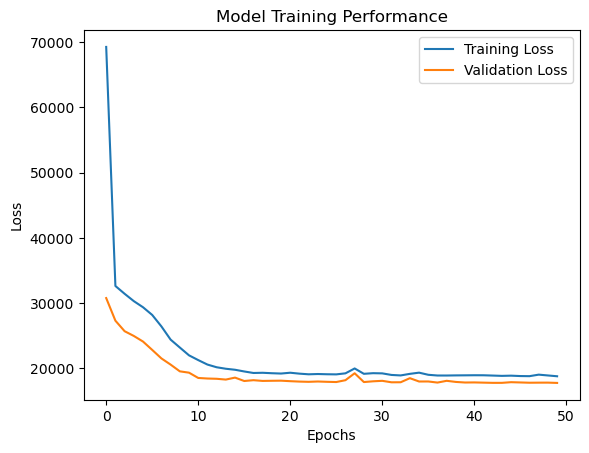

In [27]:
plt.plot(history.history['loss'], label='Training Loss')  
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Performance")
plt.legend()
plt.show()


In [29]:
prediction=model.predict(x_test)
prediction

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[279.12268],
       [260.93286],
       [292.32114],
       [248.70195],
       [231.59764],
       [256.4619 ],
       [186.63991],
       [258.07416],
       [250.00786],
       [272.11755],
       [332.95508],
       [280.81534],
       [292.69037],
       [246.17436],
       [244.39589],
       [252.59483],
       [295.55212],
       [228.37578],
       [254.19887],
       [215.19661],
       [271.69427],
       [270.16354],
       [200.51549],
       [249.66454],
       [266.6987 ],
       [268.23416],
       [327.127  ],
       [278.0908 ],
       [265.83218],
       [247.64192],
       [260.06882],
       [329.28796],
       [189.4508 ],
       [341.82166],
       [288.0041 ],
       [327.14902],
       [224.4606 ],
       [340.70538],
       [160.18518],
       [282.29718],
       [276.48334],
       [274.46466],
       [224.73344],
       [173.32738],
       [248.29918],
       [335.7564 ],
       [298.07352],
       [191.96889],
       [263.67123],
       [196.4385 ],


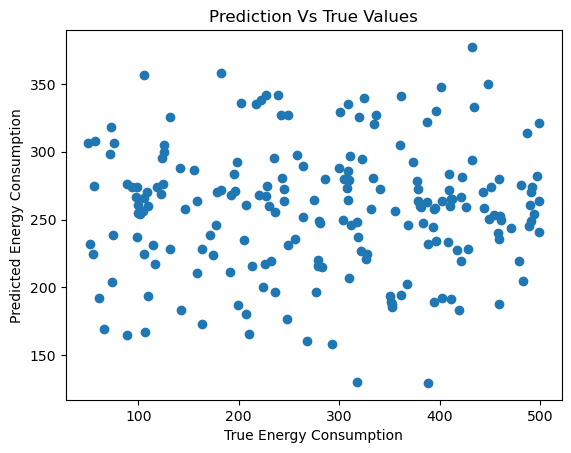

In [30]:
plt.scatter(y_test,prediction)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title("Prediction Vs True Values")
plt.show()